In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [144]:
dfs = []
for i in range(1, 13):
    file_name = f'log{i}.txt'
    df = pd.read_csv(file_name)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

In [145]:
header_row = ['it', ' score', ' cells', ' ret_suc', ' exp_suc', ' rew_mean',
       ' len_mean', ' ep', ' arch_suc', ' cum_suc', ' frames', ' policy_loss',
       ' value_loss', ' l2_loss', ' policy_entropy', ' approxkl', ' clipfrac',
       ' sil_pg_loss', ' sil_vf_loss', ' sil_loss', ' sil_entropy',
       ' sil_valid_min', ' sil_valid_max', ' sil_valid_mean',
       ' neglop_sil_min', ' neglop_sil_max', ' neglop_sil_mean',
       ' mean_val_pred', ' mean_sil_r', ' sil_frames', ' no_score_cells',
       ' cells_found_ret', ' cells_found_rand', ' cells_found_policy']

# Identify rows that match the header
mask = df.apply(lambda row: all(row == header_row), axis=1)

# Drop rows that match the header
df = df[~mask].reset_index(drop=True)

In [146]:
df.columns

Index(['it', ' score', ' cells', ' ret_suc', ' exp_suc', ' rew_mean',
       ' len_mean', ' ep', ' arch_suc', ' cum_suc', ' frames', ' policy_loss',
       ' value_loss', ' l2_loss', ' policy_entropy', ' approxkl', ' clipfrac',
       ' sil_pg_loss', ' sil_vf_loss', ' sil_loss', ' sil_entropy',
       ' sil_valid_min', ' sil_valid_max', ' sil_valid_mean',
       ' neglop_sil_min', ' neglop_sil_max', ' neglop_sil_mean',
       ' mean_val_pred', ' mean_sil_r', ' sil_frames', ' no_score_cells',
       ' cells_found_ret', ' cells_found_rand', ' cells_found_policy'],
      dtype='object')

In [147]:
# Correct the variable name
non_zero_policy_entropy = df[' policy_loss'] != 0

# If any non-zero values are found, print them
if non_zero_policy_entropy.any():
    print("Non-zero values in 'policy_entropy' column:")
    print(df.loc[non_zero_policy_entropy, ' policy_loss'])
else:
    print("All values in 'policy_entropy' column are zero.")


Non-zero values in 'policy_entropy' column:
9             0.011605
10           -0.159982
12           -0.056402
13            0.183299
14            0.123555
             ...      
20176      -0.21322422
20177     -0.071624264
20178     -0.097998396
20179      -0.12416437
20180      -0.13570565
Name:  policy_loss, Length: 20101, dtype: object


In [148]:
columns_with_nan = df.isna().any()

# Filter and display only the columns that contain NaN values
columns_with_nan = columns_with_nan[columns_with_nan == True]

print(columns_with_nan)

Series([], dtype: bool)


In [149]:
df.columns = df.columns.str.strip()

In [150]:
# Filter the column to find string values
string_values = df['policy_entropy'].apply(lambda x: isinstance(x, str))

# Print the string values
if string_values.any():
    print("String values in 'policy_entropy' column:")
    print(df.loc[string_values, 'policy_entropy'])
else:
    print("No string values found in 'policy_entropy' column.")


String values in 'policy_entropy' column:
9690        0.000297534
9691         0.03438643
9692        0.024408083
9693       0.0029753365
9694       6.243609e-05
              ...      
20176      0.0016786623
20177        0.00761324
20178     0.00028901873
20179        0.14201629
20180         0.5920312
Name: policy_entropy, Length: 10491, dtype: object


In [151]:
# Convert all values in the 'it' column to integers
df['it'] = df['it'].astype(int)
# Ensure the DataFrame is sorted by the 'it' column
df = df.sort_values(by='it').reset_index(drop=True)

# Remove duplicate iterations, keeping the last occurrence
df = df.drop_duplicates(subset='it', keep='last').reset_index(drop=True)

In [152]:
df.to_csv('combined_log.csv', index=False)

In [153]:
df.tail()

,it,score,cells,ret_suc,exp_suc,rew_mean,len_mean,ep,arch_suc,cum_suc,...,neglop_sil_min,neglop_sil_max,neglop_sil_mean,mean_val_pred,mean_sil_r,sil_frames,no_score_cells,cells_found_ret,cells_found_rand,cells_found_policy
19549,19550,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,5.245195e-06,53.54634,22.710142,14.391074,3.8122025,16572,160,63,20,76
19550,19551,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,0.0,56.345585,25.031267,12.111588,8.046708,16700,160,63,20,76
19551,19552,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,0.0,57.222702,20.038433,10.317737,6.649176,16828,160,63,20,76
19552,19553,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,0.0,27.694763,8.642021,10.946983,5.114233,16956,160,63,20,76
19553,19554,500.0,160,0.0,-1,130.0,307.15,13433,0.15800949751845852,25.281519602953363,...,0.0,34.2522,5.609294,8.685696,2.8549416,17084,160,63,20,76


In [154]:
unique_scores = df['score'].unique()
print(unique_scores)

[0.0 100.0 400.0 500.0 ' 500.0']


In [104]:
#Showing the first occurences of scores
results = []
# Loop through each score and get the first row where the score matches
for score in unique_scores:
    filtered_df = df[df['score'] == score]
    if not filtered_df.empty:
        first_row = filtered_df.iloc[0]  # Get the first row where score matches
        results.append(first_row)
        
results_df = pd.DataFrame(results)

results_df

,it,score,cells,ret_suc,exp_suc,rew_mean,len_mean,ep,arch_suc,cum_suc,...,mean_val_pred,mean_sil_r,sil_frames,no_score_cells,cells_found_ret,cells_found_rand,cells_found_policy,policy_loss_smoothed,value_loss_smoothed,policy_entropy_smoothed
0,1,0.0,32,1.0,0.538462,0.0,24.833333,6,0.03125,1.0,...,0.002321,0.0,384,32,0,3,28,NaN,NaN,NaN
1239,1240,100.0,54,0.05,0.0,0.0,44.04,2689,0.322353,17.407083,...,2.939767,1.064992,888,54,8,6,39,0.000000,0.000000,0.000000
3202,3203,400.0,101,0.02,0.0,83.0,176.83,4755,0.225633,22.788921,...,3.460703,2.779333,2538,101,19,17,64,-0.117180,0.120424,0.123542
8780,8781,500.0,149,0.02,0.0,267.0,401.58,7633,0.173837,25.901775,...,8.26408,6.614584,5554,149,52,20,76,-0.037865,0.028723,0.594044
9578,9579,500.0,160,0.01,0.0,239.0,458.86,7919,0.16483850413217518,26.37416066114803,...,9.61066,5.0332484,8507,160,63,20,76,-0.079686,0.060818,0.014568


In [105]:
# Check if 'cells' column is in increasing order
if df['cells'].is_monotonic_increasing:
    print("The 'cells' column is in increasing order.")
else:
    print("The 'cells' column is not in increasing order.")

The 'cells' column is not in increasing order.


In [17]:
# Display rows around index 2270, including the row at index 2270
index = 2270
rows_to_show = df.loc[index-1:index+1]
rows_to_show

,it,score,cells,ret_suc,exp_suc,rew_mean,len_mean,ep,arch_suc,cum_suc,...,neglop_sil_min,neglop_sil_max,neglop_sil_mean,mean_val_pred,mean_sil_r,sil_frames,no_score_cells,cells_found_ret,cells_found_rand,cells_found_policy
2269,2270,100,74,0,0,47,119,3865,0,20,...,0,20,4,6,2,1444,74,17,9,47
2270,2271,100,71,0,0,34,100,3894,0,20,...,0,21,5,5,4,3017,71,17,6,47
2271,2272,100,71,0,0,34,100,3894,0,20,...,0,16,3,4,4,3145,71,17,6,47


In [19]:
def check_ep_increasing(df):
    is_sorted = df['ep'].is_monotonic_increasing
    if is_sorted:
        print("The 'ep' column is sorted in increasing order.")
    else:
        print("The 'ep' column is not sorted in increasing order.")
check_ep_increasing(df) 

The 'ep' column is not sorted in increasing order.


However in each seperate log file (without interrupting the training) the ep is always increasing ==> decreases are due to interrupting and resuming training from checkpoints

In [27]:
# Find the first index where the 'ep' column value decreases
decrease_indices = df[df['ep'].diff() < 0].index

# Display the indices where decreases occur
print("Indices where decreases occurs:", decrease_indices.tolist())

Indices where decreases occurs: [475, 477, 2261, 2268, 3710, 7173, 7179, 7548, 7554, 8435, 9178, 9180, 9572, 9575, 9577, 9583, 9588, 10694, 10700, 11537, 12032, 12034, 12039, 12480, 12497, 12500, 12504, 12507, 12512, 12514, 12516, 12518, 12522, 12524, 12823, 12825, 13252, 13256, 13258, 13546, 13550, 13556, 13560, 13564, 13568, 13573, 13577, 13582, 13630, 13634, 13637, 13795, 13798, 13802, 13804, 13811, 13818, 13823, 13827, 13839, 13842, 14975, 14980, 14987, 14994, 14996, 14998, 15001, 15004, 15011, 15013, 15019, 15022, 15025, 15030, 15035, 15037, 15039, 15044, 15142, 15148, 15152, 15361, 15365, 15664, 15668, 15671, 15680, 15682, 15687, 15694, 16181, 16187, 16349, 16450, 16452, 17319, 19356, 19359]


In [28]:
## for index in decrease_indices:
start_index = max(0, index - 1)
end_index = min(len(df), index + 2)
    
print("\n'ep' column values around index", index)
for i in range(start_index, end_index):
    print(df['ep'].iloc[i])


'ep' column values around index 2270
3865
3894
3894


In [52]:
# Function to check if the value in 'ep' column at a given index appears more than once
# or if the value -1 appears at least once
def check_ep_occurrences(df, indices):
    results = []
    for index in indices:
        ep_value = df.loc[index, 'ep']
        count = (df['ep'] == ep_value).sum()
        minus_one_count = (df['ep'] == -1).sum()
        results.append(count > 1 or minus_one_count > 0)
    return results

# Get the results
results = check_ep_occurrences(df, decrease_indices)

# Print the results
for index, result in zip(decrease_indices, results):
    print(f"Index {index}: {'True' if result else 'False'}")


Index 475: False
Index 477: False
Index 2261: False
Index 2268: False
Index 3710: False
Index 7173: False
Index 7179: True
Index 7548: False
Index 7554: False
Index 8435: True
Index 9178: False
Index 9180: False
Index 9572: True
Index 9575: True
Index 9577: True
Index 9583: False
Index 9588: False
Index 10694: True
Index 10700: True
Index 11537: True
Index 12032: True
Index 12034: True
Index 12039: True
Index 12480: True
Index 12497: True
Index 12500: True
Index 12504: True
Index 12507: True
Index 12512: True
Index 12514: True
Index 12516: True
Index 12518: True
Index 12522: True
Index 12524: True
Index 12823: False
Index 12825: False
Index 13252: False
Index 13256: True
Index 13258: True
Index 13546: False
Index 13550: True
Index 13556: False
Index 13560: False
Index 13564: True
Index 13568: True
Index 13573: False
Index 13577: True
Index 13582: True
Index 13630: True
Index 13634: True
Index 13637: False
Index 13795: False
Index 13798: False
Index 13802: False
Index 13804: True
Index 

In [22]:
def check_ep_rew_len_consistency(df):
    # Group by 'ep' and then check for unique combinations of 'rew_mean' and 'len_mean'
    grouped = df.groupby('ep').apply(lambda group: group[['rew_mean', 'len_mean']].nunique())

    # Filter groups where either 'rew_mean' or 'len_mean' have more than one unique value
    inconsistent_groups = grouped[(grouped['rew_mean'] > 1) | (grouped['len_mean'] > 1)]

    return inconsistent_groups

In [23]:
inconsistent_groups = check_ep_rew_len_consistency(df)
print(inconsistent_groups)

       rew_mean  len_mean
ep                       
7081          2         2
8967          1         2
9219          1         2
9284          1         2
9285          1         2
9287          1         2
9288          1         2
9624          1         2
9625          1         2
9743          1         2
9764          1         2
9765          1         2
9894          1         2
9897          1         2
9898          1         2
9899          1         2
9900          1         2
9902          1         2
9903          1         2
9908          1         2
10410         1         2
10414         1         2
10416         1         2
10417         1         2
10418         1         2
10419         1         2
10420         1         2
10421         1         2
10422         1         2
10423         1         2
10426         1         2
10427         1         2
10430         1         2
10431         1         2
10432         1         2
10433         1         2
10435       

In [24]:
# Get the inconsistent 'ep' values
inconsistent_eps = inconsistent_groups.index

# Filter the original DataFrame to show only the rows with inconsistent 'ep' values
inconsistent_rows = df[df['ep'].isin(inconsistent_eps)]

# Display the inconsistent rows
inconsistent_rows

,it,score,cells,ret_suc,exp_suc,rew_mean,len_mean,ep,arch_suc,cum_suc,...,neglop_sil_min,neglop_sil_max,neglop_sil_mean,mean_val_pred,mean_sil_r,sil_frames,no_score_cells,cells_found_ret,cells_found_rand,cells_found_policy
7544,7545,400,134,0,-1,28,308,7081,0,25,...,0,58,8,10,5,5764,134,37,20,76
7545,7546,400,134,0,-1,28,308,7081,0,25,...,0,58,7,9,3,5775,134,37,20,76
7546,7547,400,134,0,-1,28,308,7081,0,25,...,0,19,5,5,2,5903,134,37,20,76
7547,7548,400,134,0,-1,28,308,7081,0,25,...,0,10,3,5,6,6031,134,37,20,76
7549,7550,400,134,0,-1,28,308,7081,0,25,...,0,7,1,5,5,6287,134,37,20,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15682,15683,500,160,0,-1,0,333,10715,0,25,...,0,60,20,11,2,15368,160,63,20,76
15683,15684,500,160,0,-1,0,333,10716,0,25,...,0,145,41,11,7,15496,160,63,20,76
15684,15685,500,160,0,-1,0,333,10716,0,25,...,0,126,37,11,6,15290,160,63,20,76
15694,15695,500,160,0,-1,0,334,10720,0,25,...,0,147,48,12,2,15185,160,63,20,76


#### Handling the inconsistencies in the log due to training interruptions and resumptions

In [25]:
# Function to find the index of the greatest value less than a given value in the ep column
def find_greatest_less_than(df, ep_value, current_index):
    lesser_values = df[(df['ep'] <= ep_value) & (df.index < current_index)]
    if not lesser_values.empty:
        max_less_than_value = lesser_values['ep'].max()
        return lesser_values[lesser_values['ep'] == max_less_than_value].index[0]
    return None
    
# Function to make the DataFrame consistent by removing appropriate rows
def make_df_consistent(df, decrease_indices):
    indices_to_drop = []
    for decrease_index in decrease_indices:
        ep_value = df.loc[decrease_index, 'ep']
        
        # Check for previous occurrence of the same ep value
        previous_index = find_greatest_less_than(df, ep_value, decrease_index)
        if df.loc[previous_index, 'ep'] == ep_value: 
            indices_to_drop.extend(range(previous_index, decrease_index))
        else:
            indices_to_drop.extend(range(previous_index+1, decrease_index))
    
    df.drop(indices_to_drop, inplace=True)


In [29]:
# Make the DataFrame consistent
make_df_consistent(df, decrease_indices)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [30]:
 df['it'] = range(1, len(df) + 1)

In [31]:
check_ep_increasing(df) 

The 'ep' column is sorted in increasing order.


In [32]:
inconsistent_groups = check_ep_rew_len_consistency(df)
print(inconsistent_groups)

Empty DataFrame
Columns: [rew_mean, len_mean]
Index: []


In [155]:
df

,it,score,cells,ret_suc,exp_suc,rew_mean,len_mean,ep,arch_suc,cum_suc,...,neglop_sil_min,neglop_sil_max,neglop_sil_mean,mean_val_pred,mean_sil_r,sil_frames,no_score_cells,cells_found_ret,cells_found_rand,cells_found_policy
0,1,0.0,32,1.0,0.538462,0.0,24.833333,6,0.03125,1.0,...,2.887126,2.896684,2.891848,0.002321,0.0,384,32,0,3,28
1,2,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,2.577465,2.935747,2.826621,0.001925,1.109015,484,34,0,3,30
2,3,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,1.529812,3.268217,2.736892,0.318472,1.71919,612,34,0,3,30
3,4,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,0.762439,3.880691,2.885801,1.001743,1.043319,740,34,0,3,30
4,5,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,0.561459,4.72757,2.260975,1.89145,1.395257,868,34,0,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19549,19550,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,5.245195e-06,53.54634,22.710142,14.391074,3.8122025,16572,160,63,20,76
19550,19551,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,0.0,56.345585,25.031267,12.111588,8.046708,16700,160,63,20,76
19551,19552,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,0.0,57.222702,20.038433,10.317737,6.649176,16828,160,63,20,76
19552,19553,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,0.0,27.694763,8.642021,10.946983,5.114233,16956,160,63,20,76


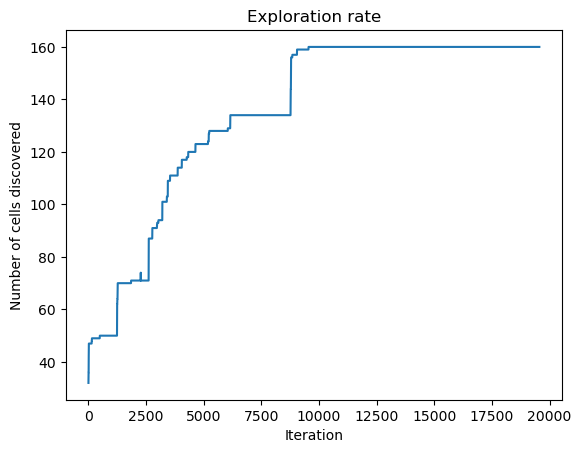

In [156]:
plt.plot(df['it'], df['cells'])
plt.xlabel('Iteration')
plt.ylabel('Number of cells discovered')
plt.title('Exploration rate')
plt.show()

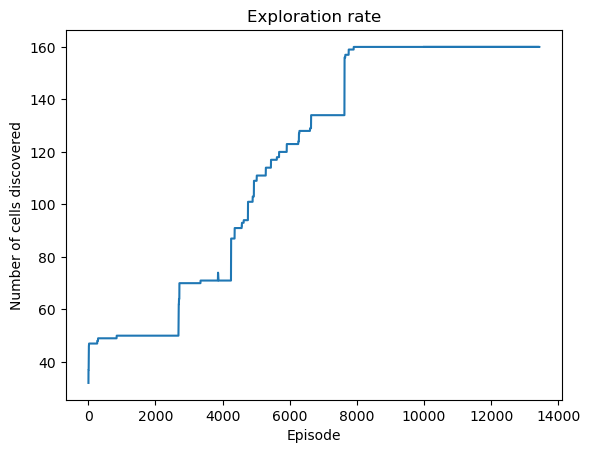

In [157]:
df_last_cells = df.groupby('ep')['cells'].last().reset_index()

# Plotting
plt.plot(df_last_cells['ep'], df_last_cells['cells'])
plt.xlabel('Episode')
plt.ylabel('Number of cells discovered')
plt.title('Exploration rate')
plt.show()

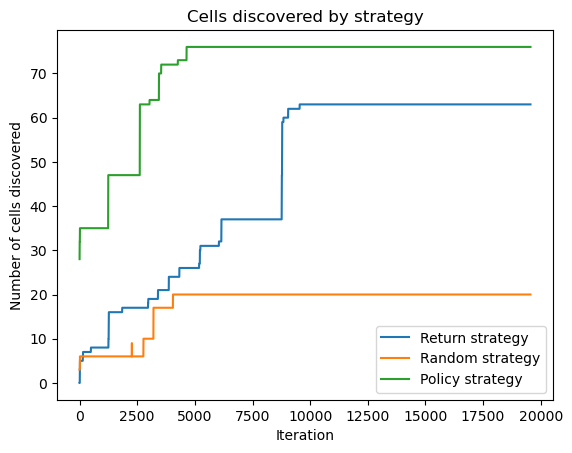

In [158]:
plt.plot(df['it'], df['cells_found_ret'], label='Return strategy')
plt.plot(df['it'], df['cells_found_rand'], label='Random strategy')
plt.plot(df['it'], df['cells_found_policy'], label='Policy strategy')
plt.xlabel('Iteration')
plt.ylabel('Number of cells discovered')
plt.title('Cells discovered by strategy')
plt.legend()
plt.show()

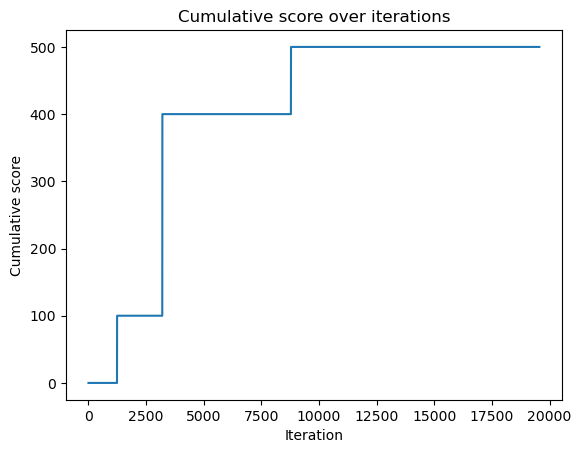

In [159]:
plt.plot(df['it'], df['score'])
plt.xlabel('Iteration')
plt.ylabel('Cumulative score')
plt.title('Cumulative score over iterations')
plt.show()

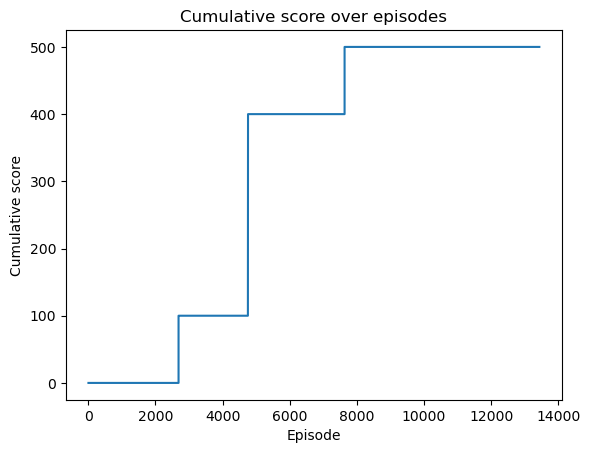

In [160]:
plt.plot(df['ep'], df['score'])
plt.xlabel('Episode')
plt.ylabel('Cumulative score')
plt.title('Cumulative score over episodes')
plt.show()

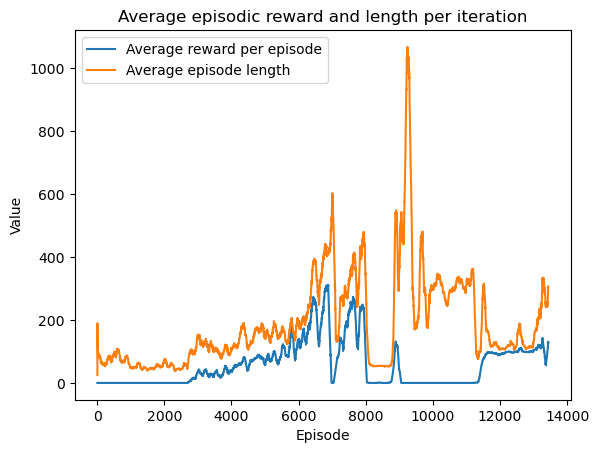

In [161]:
plt.plot(df['ep'], df['rew_mean'], label='Average reward per episode') 
plt.plot(df['ep'], df['len_mean'], label='Average episode length')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.title('Average episodic reward and length per iteration')
plt.legend()
plt.show()


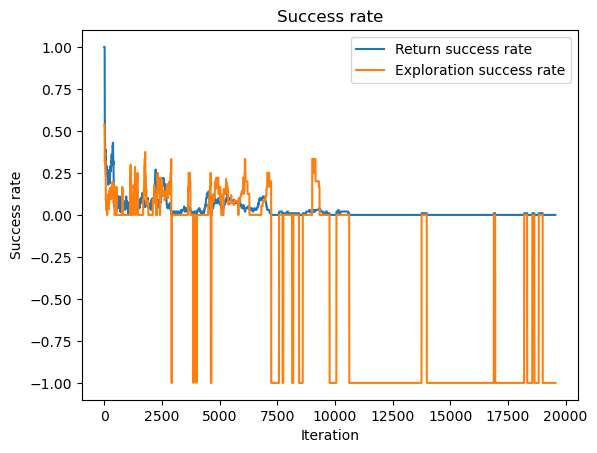

In [162]:
plt.plot(df['it'], df['ret_suc'], label='Return success rate')
plt.plot(df['it'], df['exp_suc'], label='Exploration success rate')
plt.xlabel('Iteration')
plt.ylabel('Success rate')
plt.title('Success rate')
plt.legend()
plt.show()

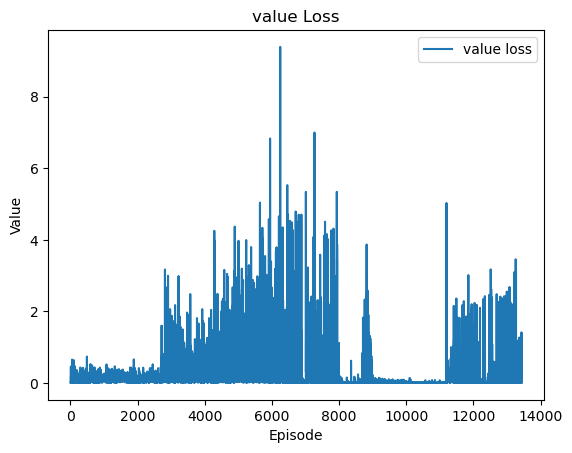

In [163]:
plt.plot(df['ep'], df['value_loss'], label='value loss')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.title('value Loss')
plt.legend()
plt.show()

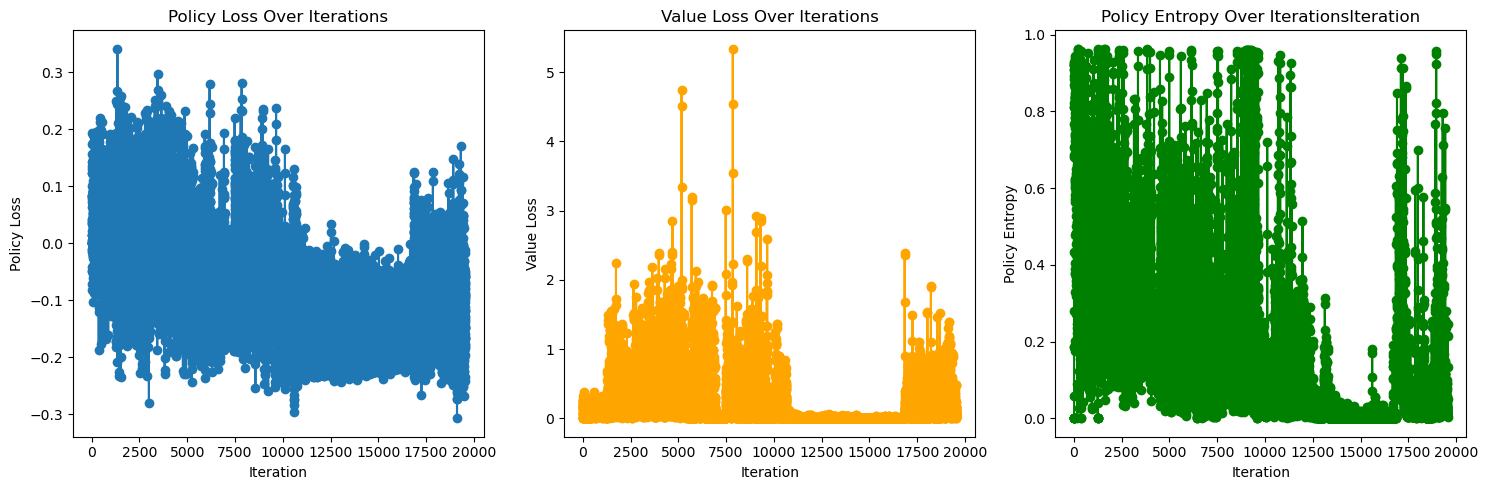

In [164]:
# Apply a rolling average to smooth the curves
df['policy_loss_smoothed'] = df['policy_loss'].rolling(window=3).mean()
df['value_loss_smoothed'] = df['value_loss'].rolling(window=3).mean()
df['policy_entropy_smoothed'] = df['policy_entropy'].rolling(window=3).mean()

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(df['it'], df['policy_loss_smoothed'], marker='o')
plt.xlabel('Iteration')
plt.ylabel('Policy Loss')
plt.title('Policy Loss Over Iterations')

plt.subplot(1, 3, 2)
plt.plot(df['it'], df['value_loss_smoothed'], marker='o', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Value Loss')
plt.title('Value Loss Over Iterations')

plt.subplot(1, 3, 3)
plt.plot(df['it'], df['policy_entropy_smoothed'], marker='o', color='green')
plt.xlabel('Iteration')
plt.ylabel('Policy Entropy')
plt.title('Policy Entropy Over IterationsIteration')

plt.tight_layout()
plt.show()

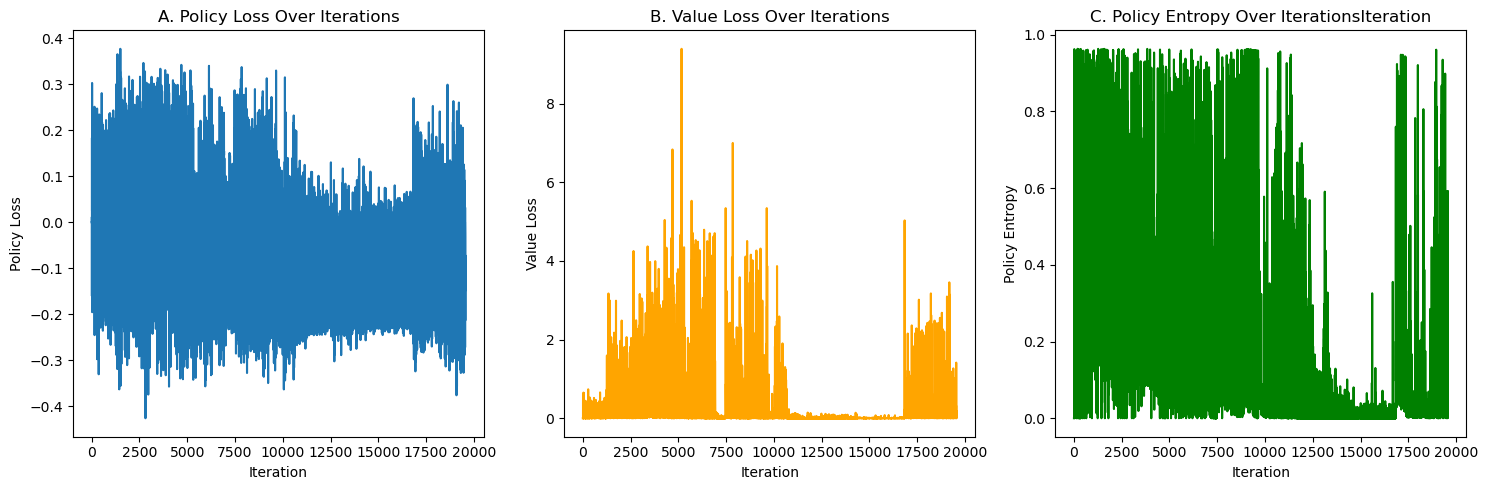

In [180]:
# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(df['it'], df['policy_loss'])
plt.xlabel('Iteration')
plt.ylabel('Policy Loss')
plt.title('A. Policy Loss Over Iterations')

plt.subplot(1, 3, 2)
plt.plot(df['it'], df['value_loss'], color='orange')
plt.xlabel('Iteration')
plt.ylabel('Value Loss')
plt.title('B. Value Loss Over Iterations')

plt.subplot(1, 3, 3)
plt.plot(df['it'], df['policy_entropy'], color='green')
plt.xlabel('Iteration')
plt.ylabel('Policy Entropy')
plt.title('C. Policy Entropy Over IterationsIteration')

plt.tight_layout()
plt.show()

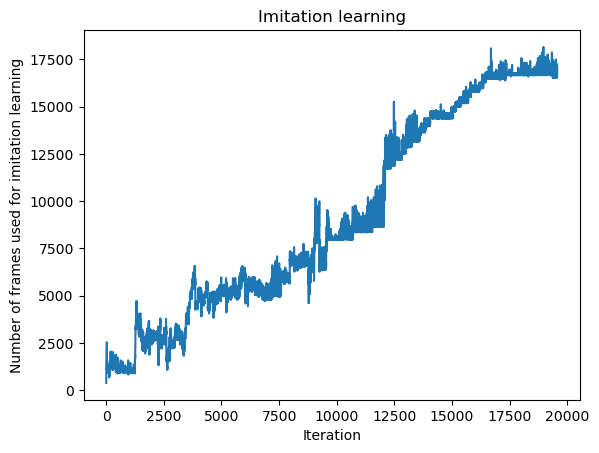

In [166]:
plt.plot(df['it'], df['sil_frames'])
plt.xlabel('Iteration')
plt.ylabel('Number of frames used for imitation learning')
plt.title('Imitation learning')
plt.show()

plots: 

reward mean 
return success rate and exploration success rate : first return then explore : first the agent sets a goal to return to a state and then sets exploration goals (internal functionning of the algorithm)


In [171]:
df["policy_loss"].head(2000)

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
1995    0.197235
1996   -0.111501
1997    0.097533
1998    0.285545
1999   -0.025168
Name: policy_loss, Length: 2000, dtype: object

In [172]:
df

,it,score,cells,ret_suc,exp_suc,rew_mean,len_mean,ep,arch_suc,cum_suc,...,mean_val_pred,mean_sil_r,sil_frames,no_score_cells,cells_found_ret,cells_found_rand,cells_found_policy,policy_loss_smoothed,value_loss_smoothed,policy_entropy_smoothed
0,1,0.0,32,1.0,0.538462,0.0,24.833333,6,0.03125,1.0,...,0.002321,0.0,384,32,0,3,28,NaN,NaN,NaN
1,2,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,0.001925,1.109015,484,34,0,3,30,NaN,NaN,NaN
2,3,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,0.318472,1.71919,612,34,0,3,30,0.000000,0.000000,0.000000
3,4,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,1.001743,1.043319,740,34,0,3,30,0.000000,0.000000,0.000000
4,5,0.0,34,1.0,0.533333,0.0,30.714286,7,0.029412,1.0,...,1.89145,1.395257,868,34,0,3,30,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19549,19550,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,14.391074,3.8122025,16572,160,63,20,76,-0.167087,0.090694,0.215074
19550,19551,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,12.111588,8.046708,16700,160,63,20,76,-0.137595,0.104789,0.132547
19551,19552,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,10.317737,6.649176,16828,160,63,20,76,-0.127616,0.082771,0.003194
19552,19553,500.0,160,0.0,-1,126.0,300.86,13432,0.15800949751845852,25.281519602953363,...,10.946983,5.114233,16956,160,63,20,76,-0.097929,0.034338,0.049973


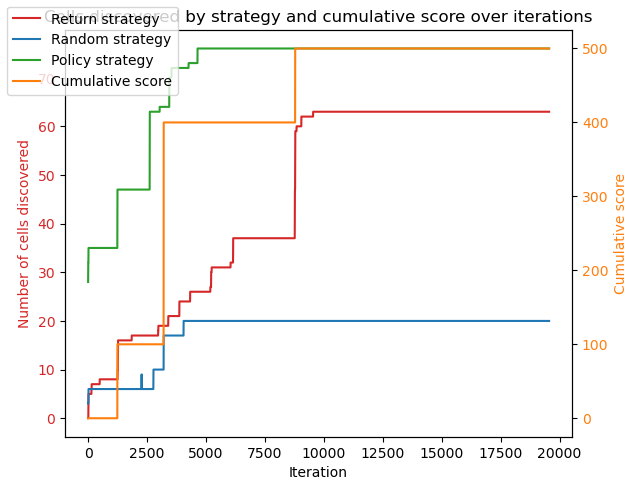

In [174]:
# Create the first plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Number of cells discovered', color=color)
ax1.plot(df['it'], df['cells_found_ret'], label='Return strategy', color='tab:red')
ax1.plot(df['it'], df['cells_found_rand'], label='Random strategy', color='tab:blue')
ax1.plot(df['it'], df['cells_found_policy'], label='Policy strategy', color='tab:green')
ax1.tick_params(axis='y', labelcolor=color)

# Create the second plot
ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Cumulative score', color=color)
ax2.plot(df['it'], df['score'], label='Cumulative score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and legend
fig.tight_layout()
plt.title('Cells discovered by strategy and cumulative score over iterations')
fig.legend(loc='upper left')

plt.show()


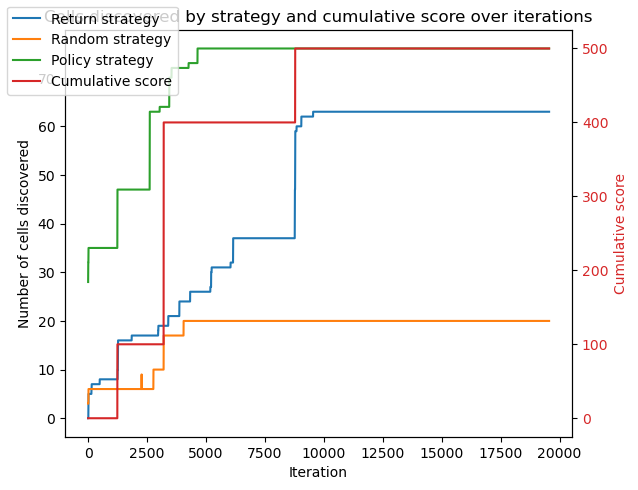

In [179]:
# Create the first plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Number of cells discovered')
ax1.plot(df['it'], df['cells_found_ret'], label='Return strategy', color='tab:blue')
ax1.plot(df['it'], df['cells_found_rand'], label='Random strategy', color='tab:orange')
ax1.plot(df['it'], df['cells_found_policy'], label='Policy strategy', color='tab:green')
ax1.tick_params(axis='y')

# Create the second plot
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Cumulative score', color=color)
ax2.plot(df['it'], df['score'], label='Cumulative score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and legend
fig.tight_layout()
plt.title('Cells discovered by strategy and cumulative score over iterations')
fig.legend(loc='upper left')

plt.show()


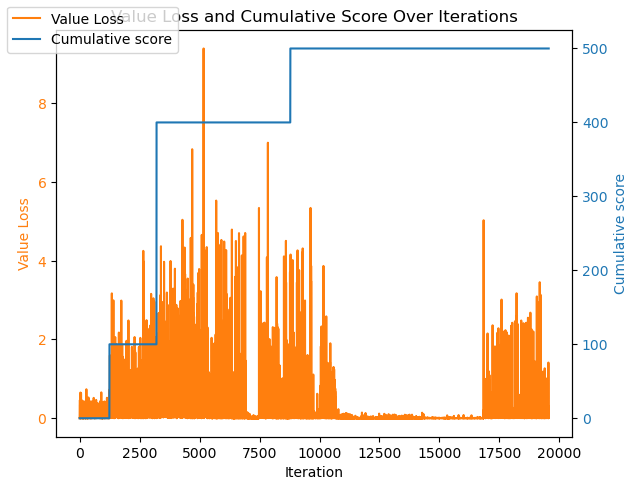

In [181]:
# Create the first plot
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Value Loss', color=color)
ax1.plot(df['it'], df['value_loss'], label='Value Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second plot
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Cumulative score', color=color)
ax2.plot(df['it'], df['score'], label='Cumulative score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and legend
fig.tight_layout()
plt.title('Value Loss and Cumulative Score Over Iterations')
fig.legend(loc='upper left')

plt.show()
